In [ ]:
#####Calculate Background Percentage####
celltype = 'Gm12878'
resn='10kb'
res = 10000

######Calculate countmat for each chr######

DPrawout1=open('/storage/home/lua137/work/TADcalling/overlapboundary1.'+celltype+'.txt','wa')
DPrawout2=open('/storage/home/lua137/work/TADcalling/overlapboundary2.'+celltype+'.txt','wa')
DPrawout3=open('/storage/home/lua137/work/TADcalling/overlapboundary3.'+celltype+'.txt','wa')
DPrawout4=open('/storage/home/lua137/work/TADcalling/overlapboundary4.'+celltype+'.txt','wa')
DPrawout5=open('/storage/home/lua137/work/TADcalling/overlapboundary5.'+celltype+'.txt','wa')

for chrnum in range(1,23):
        OnTAD_raw = pandas.read_table('/storage/home/lua137/work/TADcalling/OnTAD/'+celltype+'/10kb/OnTAD_KRnorm_pen0.1_max200_hsz5_chr'+str(chrnum)+'.tad',sep='\t',header=None)
        OnTAD_rawa = OnTAD_raw.loc[(OnTAD_raw[2]>0),:].values[:,0:2]-1
        OnTAD_rawb = np.unique(OnTAD_rawa.flatten()) 
        OnTAD_rawfr = getlevel(OnTAD_rawa)
        
        OnTAD_rawallb, OnTAD_rawalll = boundarylevel(OnTAD_rawfr)
        OnTAD_rawo1b = OnTAD_rawallb[OnTAD_rawalll==1]
        OnTAD_rawo2b = OnTAD_rawallb[OnTAD_rawalll==2]
        OnTAD_rawo3b = OnTAD_rawallb[OnTAD_rawalll==3]
        OnTAD_rawo4b = OnTAD_rawallb[OnTAD_rawalll==4]
        OnTAD_rawo5b = OnTAD_rawallb[OnTAD_rawalll>=5]

        for i in OnTAD_rawo1b:
                DPrawout1.write('chr'+str(chrnum)+'\t'+str(int(i)*res)+'\t'+str(int(i+1)*res)+'\t'+str(sum(OnTAD_rawa[:,0]==i))+'\t'+str(sum(OnTAD_rawa[:,1]==i))+'\n')
        for i in OnTAD_rawo2b:
                DPrawout2.write('chr'+str(chrnum)+'\t'+str(int(i)*res)+'\t'+str(int(i+1)*res)+'\t'+str(sum(OnTAD_rawa[:,0]==i))+'\t'+str(sum(OnTAD_rawa[:,1]==i))+'\n')
        for i in OnTAD_rawo3b:
                DPrawout3.write('chr'+str(chrnum)+'\t'+str(int(i)*res)+'\t'+str(int(i+1)*res)+'\t'+str(sum(OnTAD_rawa[:,0]==i))+'\t'+str(sum(OnTAD_rawa[:,1]==i))+'\n')
        for i in OnTAD_rawo4b:
                DPrawout4.write('chr'+str(chrnum)+'\t'+str(int(i)*res)+'\t'+str(int(i+1)*res)+'\t'+str(sum(OnTAD_rawa[:,0]==i))+'\t'+str(sum(OnTAD_rawa[:,1]==i))+'\n')
        for i in OnTAD_rawo5b:
                DPrawout5.write('chr'+str(chrnum)+'\t'+str(int(i)*res)+'\t'+str(int(i+1)*res)+'\t'+str(sum(OnTAD_rawa[:,0]==i))+'\t'+str(sum(OnTAD_rawa[:,1]==i))+'\n')

In [ ]:
'''
bedtools intersect -a overlapboundary1.Gm12878.txt -b TFclusterV3_Gm12878.bed.sorted  -wb > TFatoverlapboundary1.Gm12878.bed

bedtools intersect -a overlapboundary2.Gm12878.txt -b TFclusterV3_Gm12878.bed.sorted  -wb > TFatoverlapboundary2.Gm12878.bed

bedtools intersect -a overlapboundary3.Gm12878.txt -b TFclusterV3_Gm12878.bed.sorted  -wb > TFatoverlapboundary3.Gm12878.bed

bedtools intersect -a overlapboundary4.Gm12878.txt -b TFclusterV3_Gm12878.bed.sorted  -wb > TFatoverlapboundary4.Gm12878.bed

bedtools intersect -a overlapboundary5.Gm12878.txt -b TFclusterV3_Gm12878.bed.sorted  -wb > TFatoverlapboundary5.Gm12878.bed
'''

In [1]:
import sys
import pandas
import numpy as np
from StringIO import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
celltype = 'Gm12878'
tfcluster = pandas.read_table('/Users/linan/Desktop/TFclusterV3_'+celltype+'.bed.sorted',header=None)
tfat1 = pandas.read_table('/Users/linan/Desktop/TFatoverlapboundary1.'+celltype+'.bed',header=None)
tfat2 = pandas.read_table('/Users/linan/Desktop/TFatoverlapboundary2.'+celltype+'.bed',header=None)
tfat3 = pandas.read_table('/Users/linan/Desktop/TFatoverlapboundary3.'+celltype+'.bed',header=None)
tfat4 = pandas.read_table('/Users/linan/Desktop/TFatoverlapboundary4.'+celltype+'.bed',header=None)
tfat5 = pandas.read_table('/Users/linan/Desktop/TFatoverlapboundary5.'+celltype+'.bed',header=None)

IOError: File /Users/linan/Desktop/TFclusterV3_Gm12878.bed.sorted does not exist

In [13]:
chrs_length = [249250621,243199373,198022430,191154276,180915260,171115067,159138663,146364022,141213431,135534747,135006516,133851895,115169878,107349540,102531392,90354753,81195210,78077248,59128983,63025520,48129895,51304566]

In [16]:
numofB = [4614.0,3413.0,1595.0,422.0,136.0]
#numofB = [5295.0,3525.0,1719.0,518.0,134.0]

In [17]:
####calculate the number of peaks for each TF in wholegenome####
allcount = pandas.value_counts(tfcluster.iloc[:,3]).fillna(0)

In [18]:
df2 = pandas.DataFrame(np.zeros((len(allcount.index), 5)),index=allcount.index,columns=['level1','level2','level3','level4','level5'])

In [19]:
####calculate the number of peaks for each TF in each boundary level####
l1count = pandas.value_counts(tfat1.iloc[:,8]).fillna(0)
l2count = pandas.value_counts(tfat2.iloc[:,8]).fillna(0)
l3count = pandas.value_counts(tfat3.iloc[:,8]).fillna(0)
l4count = pandas.value_counts(tfat4.iloc[:,8]).fillna(0)
l5count = pandas.value_counts(tfat5.iloc[:,8]).fillna(0)

In [20]:
for i in allcount.index:
    try:
        df2.loc[i,'level1']=np.log2((l1count[i]/numofB[0]+0.01)/(allcount[i]/(sum(chrs_length)/10000+1.0)+0.01)+0.01)
    except KeyError:
        df2.loc[i,'level1']=np.log2(1.01)
    try:
        df2.loc[i,'level2']=np.log2((l2count[i]/numofB[1]+0.01)/(allcount[i]/(sum(chrs_length)/10000+1.0)+0.01)+0.01)
    except KeyError:
        df2.loc[i,'level2']=np.log2(1.01)
    try:
        df2.loc[i,'level3']=np.log2((l3count[i]/numofB[2]+0.01)/(allcount[i]/(sum(chrs_length)/10000+1.0)+0.01)+0.01)
    except KeyError:
        df2.loc[i,'level3']=np.log2(1.01)
    try:
        df2.loc[i,'level4']=np.log2((l4count[i]/numofB[3]+0.01)/(allcount[i]/(sum(chrs_length)/10000+1.0)+0.01)+0.01)
    except KeyError:
        df2.loc[i,'level4']=np.log2(1.01)
    try:
        df2.loc[i,'level5']=np.log2((l5count[i]/numofB[4]+0.01)/(allcount[i]/(sum(chrs_length)/10000+1.0)+0.01)+0.01)
    except KeyError:
        df2.loc[i,'level5']=np.log2(1.01)

In [21]:
df3 = pandas.DataFrame(np.zeros((len(allcount.index), 5)),index=allcount.index,columns=['level1','level2','level3','level4','level5'])
for i in allcount.index:
    try:
        df3.loc[i,'level1']=np.log2((l1count[i]/numofB[0]+0.01)/(l1count[i]/numofB[0]+0.01)+0.01)
    except KeyError:
        df3.loc[i,'level1']=np.log2(1.01)
    try:
        df3.loc[i,'level2']=np.log2((l2count[i]/numofB[1]+0.01)/(l1count[i]/numofB[0]+0.01)+0.01)
    except KeyError:
        df3.loc[i,'level2']=np.log2(1.01)
    try:
        df3.loc[i,'level3']=np.log2((l3count[i]/numofB[2]+0.01)/(l1count[i]/numofB[0]+0.01)+0.01)
    except KeyError:
        df3.loc[i,'level3']=np.log2(1.01)
    try:
        df3.loc[i,'level4']=np.log2((l4count[i]/numofB[3]+0.01)/(l1count[i]/numofB[0]+0.01)+0.01)
    except KeyError:
        df3.loc[i,'level4']=np.log2(1.01)
    try:
        df3.loc[i,'level5']=np.log2((l5count[i]/numofB[4]+0.01)/(l1count[i]/numofB[0]+0.01)+0.01)
    except KeyError:
        df3.loc[i,'level5']=np.log2(1.01)

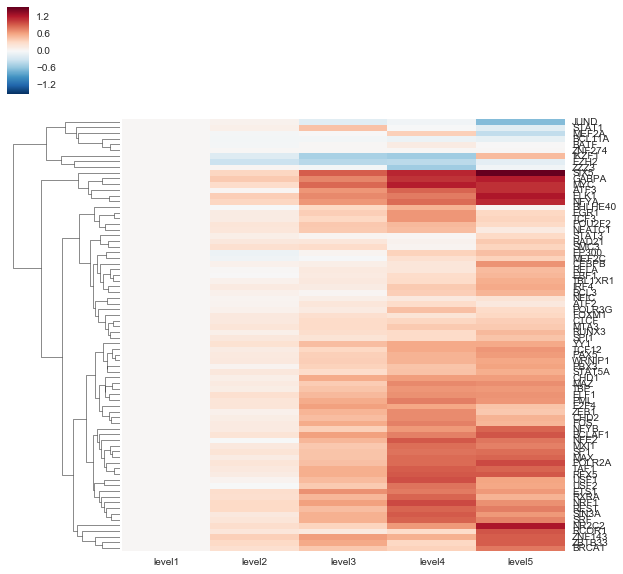

In [22]:
sns.set(font_scale=0.1,font='sans-serif')
sns.set(color_codes=True)
g = sns.clustermap(df3,vmin=-1,center=0,col_cluster=False,cmap = "RdBu_r")
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

In [95]:
df3.index[(df3.loc[:,'level5']>1)]

Index([u'POLR2A', u'ELF1', u'YY1', u'IRF1', u'PHF8', u'ATF3', u'JUN', u'ATF1',
       u'GABPA', u'TAF1', u'HMGN3', u'KDM5B', u'SIN3AK20', u'RBBP5', u'HDAC1',
       u'ETS1', u'SAP30', u'CHD1', u'E2F4', u'CHD2', u'SP1', u'MXI1', u'SRF',
       u'BCLAF1', u'NFYA', u'SIX5', u'STAT2', u'GTF2F1', u'THAP1', u'ZBTB33',
       u'SP2', u'ELK1', u'GTF2B', u'RFX5', u'EZH2', u'HDAC8', u'HDAC6'],
      dtype='object')

In [23]:
Gm12878df =  df3.loc[(df3.loc[:,'level5']>1), :]

In [14]:
K562df =  df3.loc[(df3.loc[:,'level5']>1), :]

In [24]:
Gm12878df['celltype'] = 'Gm12878'
#K562df['celltype'] = 'K562'

C:\Users\linan\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
Gm12878df

,level1,level2,level3,level4,level5,celltype
POLR2A,0.014355,0.201037,0.455443,0.860489,1.007854,Gm12878
GABPA,0.014355,0.397050,0.745768,1.095281,1.198548,Gm12878
ELK1,0.014355,0.372157,0.736323,0.790367,1.232772,Gm12878
SIX5,0.014355,0.332885,0.923854,1.164890,1.523777,Gm12878
MYC,0.014355,0.275861,0.876337,1.190754,1.117420,Gm12878
NFYA,0.014355,0.333269,0.669522,0.857133,1.149656,Gm12878
ATF3,0.014355,0.031705,0.670584,0.890992,1.111977,Gm12878
NR2C2,0.014355,0.273719,0.336104,0.657948,1.240340,Gm12878


In [26]:
plotdf = pandas.concat([Gm12878df,K562df])
plotdf = plotdf.sort_values("level5", ascending=False)

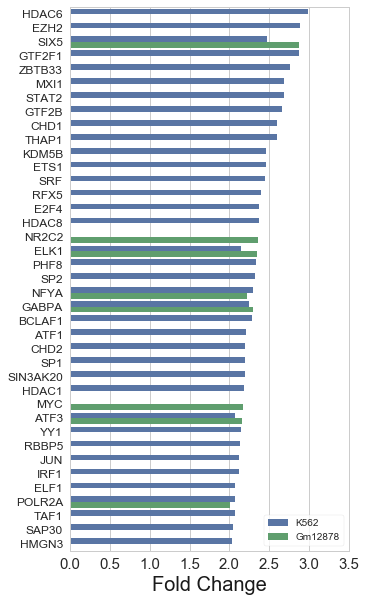

In [30]:
plt.figure(2,figsize=(5,10))
sns.set(style="whitegrid")
ax = sns.barplot(y=plotdf.index, x=np.exp2(plotdf['level5'].values), hue='celltype', data=plotdf)
ax.legend(loc='lower right',frameon=True)
ax.set(xlim = (0,3.5), ylabel="",
       xlabel="")
plt.yticks(size=12)
plt.xticks(size=15)
plt.xlabel('Fold Change', {'color': 'k', 'fontsize': 20})
plt.savefig("/Users/linan/Desktop/Main_4c.png", dpi=300, transparent=True, bbox_inches='tight')
plt.show()